# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.9.1-delta.new.290.fix.282.283.296'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Detailed citaition list:
Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
National Institute for Public Health and the Environment of Netherlands (2020), https://data.rivm.nl/covid-19/
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Eng

### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
308380,2020-10-30,801,767,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308381,2020-10-31,801,769,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308382,2020-11-01,801,770,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308383,2020-11-02,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308384,2020-11-03,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
308380,2020-10-30,Colombia,Vichada,801,25,9,767
308381,2020-10-31,Colombia,Vichada,801,23,9,769
308382,2020-11-01,Colombia,Vichada,801,22,9,770
308383,2020-11-02,Colombia,Vichada,801,20,9,772
308384,2020-11-03,Colombia,Vichada,801,20,9,772


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
225,2020-10-30,30875,1894,455,28526
226,2020-10-31,31090,1917,455,28718
227,2020-11-01,31206,1865,455,28886
228,2020-11-02,31293,1876,459,28958
229,2020-11-03,31293,1876,459,28958


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-10-30,45682409,14002238,1192085,30488086,0.013048,0.333696,0.037629
2020-10-31,46140637,14211893,1198468,30730276,0.012987,0.333007,0.037536
2020-11-01,46542967,14364360,1203084,30975523,0.012924,0.332763,0.037388
2020-11-02,46650308,14393238,1204232,31052838,0.012907,0.332826,0.037332
2020-11-03,46650310,14486600,1204232,30959478,0.012907,0.331825,0.037441


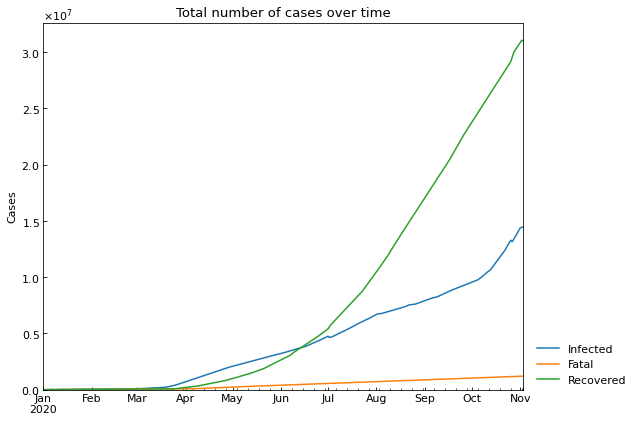

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
264,2020-10-30,100459,6833,1755,91871
265,2020-10-31,101335,7111,1769,92455
266,2020-11-01,101949,7235,1775,92939
267,2020-11-02,102438,7291,1787,93360
268,2020-11-03,102440,100653,1787,92128


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
260,2020-10-28,98116,5579,1730,90807
261,2020-10-29,98852,5797,1733,91322
262,2020-10-30,99622,5988,1744,91890
263,2020-10-31,100392,6162,1755,92475
264,2020-11-01,101146,6420,1766,92960


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
308380,2020-10-30,801,767,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308381,2020-10-31,801,769,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308382,2020-11-01,801,770,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308383,2020-11-02,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308384,2020-11-03,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
260563,COL,Colombia,Vichada,2020-10-30,107808
260564,COL,Colombia,Vichada,2020-10-31,107808
260565,COL,Colombia,Vichada,2020-11-01,107808
260566,COL,Colombia,Vichada,2020-11-02,107808
260567,COL,Colombia,Vichada,2020-11-03,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
308380,2020-10-30,801,767,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308381,2020-10-31,801,769,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308382,2020-11-01,801,770,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308383,2020-11-02,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
308384,2020-11-03,801,772,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
308380,2020-10-30,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
308381,2020-10-31,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
308382,2020-11-01,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
308383,2020-11-02,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
308384,2020-11-03,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
303,2020-10-30,1,1,1,0,0,1,1,3,2,2,1,38.89
304,2020-10-31,1,1,1,0,0,1,1,3,2,2,1,38.89
305,2020-11-01,1,1,1,0,0,1,1,3,2,2,1,38.89
306,2020-11-02,1,1,1,0,0,1,1,3,2,2,1,38.89
307,2020-11-03,1,1,1,0,0,1,1,3,2,2,1,38.89


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
303,2020-10-30,1,1,1,0,0,1,1,3,2,2,1,38.89
304,2020-10-31,1,1,1,0,0,1,1,3,2,2,1,38.89
305,2020-11-01,1,1,1,0,0,1,1,3,2,2,1,38.89
306,2020-11-02,1,1,1,0,0,1,1,3,2,2,1,38.89
307,2020-11-03,1,1,1,0,0,1,1,3,2,2,1,38.89


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

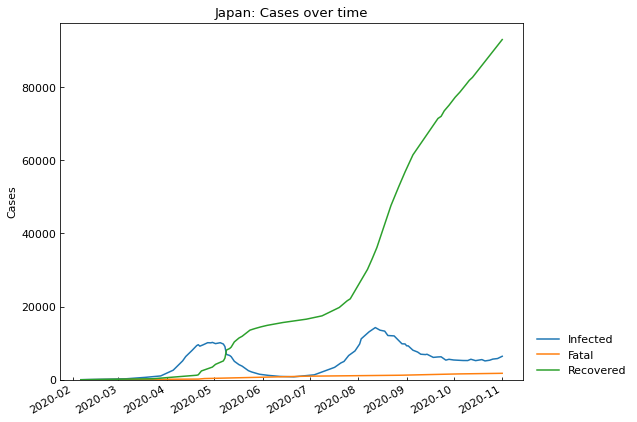

,Date,Confirmed,Infected,Fatal,Recovered
260,2020-10-28,98116,5579,1730,90807
261,2020-10-29,98852,5797,1733,91322
262,2020-10-30,99622,5988,1744,91890
263,2020-10-31,100392,6162,1755,92475
264,2020-11-01,101146,6420,1766,92960


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

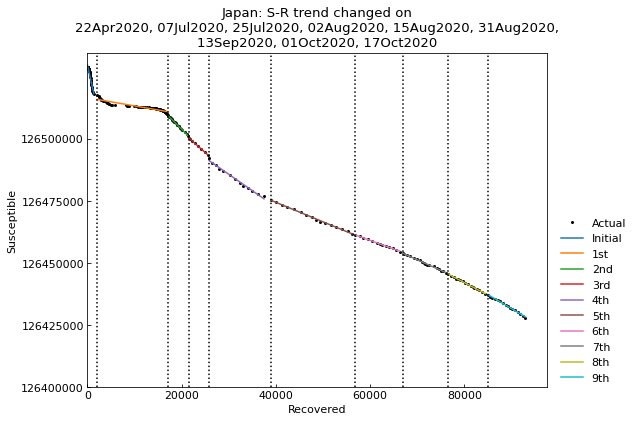

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,06Jul2020,126529100
2nd,Past,07Jul2020,24Jul2020,126529100
3rd,Past,25Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,30Aug2020,126529100
6th,Past,31Aug2020,12Sep2020,126529100
7th,Past,13Sep2020,30Sep2020,126529100
8th,Past,01Oct2020,16Oct2020,126529100
9th,Past,17Oct2020,01Nov2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (17Oct2020 - 01Nov2020): finished 1722 trials in 1 min  0 sec


	 3rd phase (25Jul2020 - 01Aug2020): finished  832 trials in 0 min 20 sec

	 2nd phase (07Jul2020 - 24Jul2020): finished  994 trials in 0 min 25 sec

	 5th phase (15Aug2020 - 30Aug2020): finished  453 trials in 0 min 10 sec

	 6th phase (31Aug2020 - 12Sep2020): finished  240 trials in 0 min  5 sec

	 7th phase (13Sep2020 - 30Sep2020): finished  350 trials in 0 min 10 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1851 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 06Jul2020): finished 1781 trials in 1 min  0 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1952 trials in 1 min  0 sec

	 8th phase (01Oct2020 - 16Oct2020): finished 2036 trials in 1 min  0 sec

Completed optimization. Total: 2 min 51 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],1/gamma [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,5.26,0.016596,0.000122,0.016762,0.003014,240,1360,9,55,0.017,0.949789,1851,1 min 0 sec
1st,Past,22Apr2020,06Jul2020,126529100,SIR-F,0.40,0.065616,0.000226,0.005004,0.011469,240,737,33,14,0.066,0.950529,1781,1 min 0 sec
2nd,Past,07Jul2020,24Jul2020,126529100,SIR-F,1.86,0.000673,0.000024,0.024316,0.013050,240,7002,6,12,0.001,0.036936,994,0 min 25 sec
3rd,Past,25Jul2020,01Aug2020,126529100,SIR-F,1.73,0.000345,0.000079,0.021604,0.012385,240,2106,7,13,0.000,0.017876,832,0 min 20 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.45,0.000164,0.000057,0.017260,0.011885,240,2923,9,14,0.000,0.069528,1952,1 min 0 sec
5th,Past,15Aug2020,30Aug2020,126529100,SIR-F,0.82,0.001119,0.000162,0.013940,0.016784,240,1030,11,9,0.001,0.029649,453,0 min 10 sec
6th,Past,31Aug2020,12Sep2020,126529100,SIR-F,0.65,0.001569,0.000191,0.011691,0.017826,240,872,14,9,0.002,0.036445,240,0 min 5 sec
7th,Past,13Sep2020,30Sep2020,126529100,SIR-F,0.93,0.000130,0.000168,0.013002,0.013790,240,990,12,12,0.000,0.088691,350,0 min 10 sec
8th,Past,01Oct2020,16Oct2020,126529100,SIR-F,0.99,0.000171,0.000176,0.016904,0.016822,240,947,9,9,0.000,0.017738,2036,1 min 0 sec
9th,Past,17Oct2020,01Nov2020,126529100,SIR-F,1.06,0.001040,0.000167,0.017081,0.015925,240,998,9,10,0.001,0.038215,1722,1 min 0 sec


### Accuracy of estimation

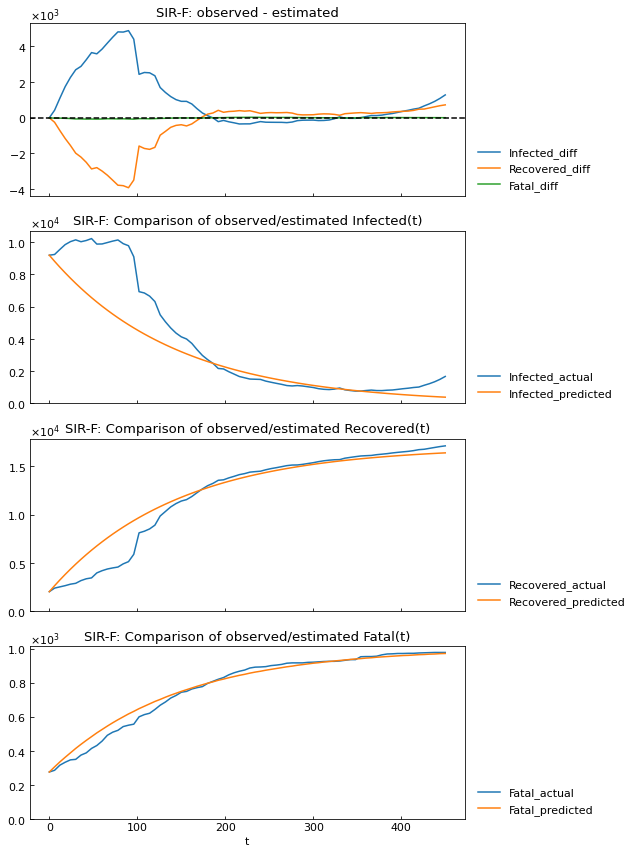

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

1.45

### Show parameter history

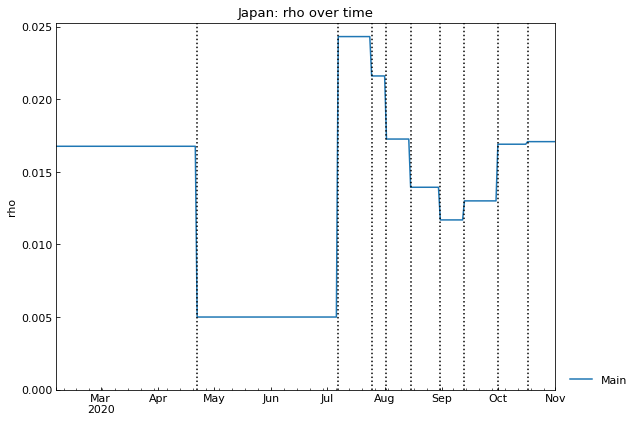

In [32]:
_ = snl.history(target="rho")

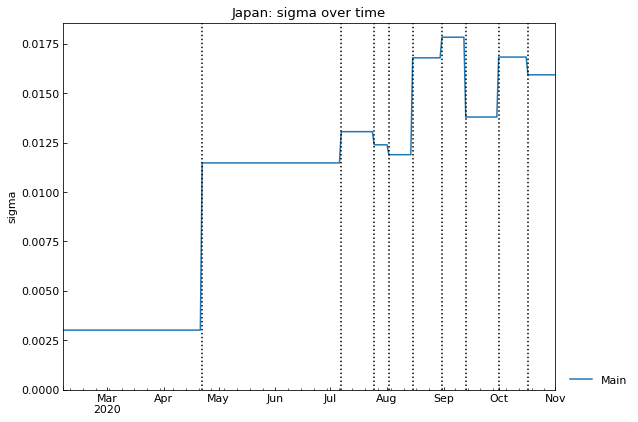

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

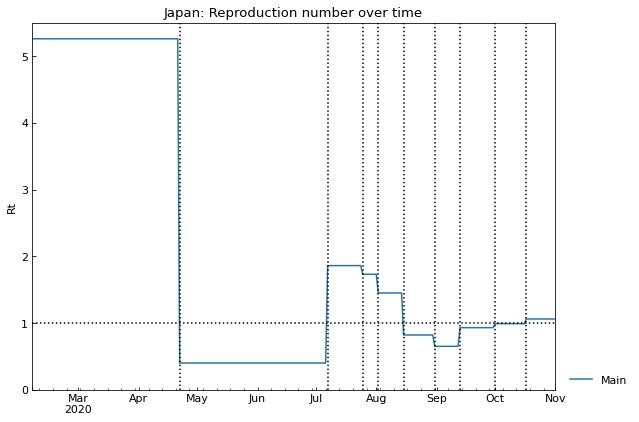

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

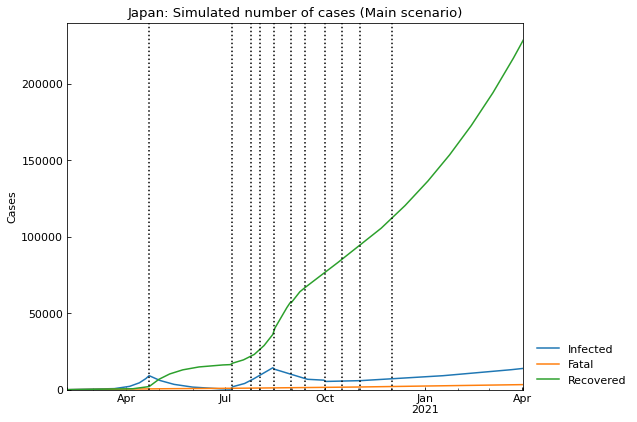

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,240140,3265,13609,223266
418,2021-03-30,241535,3280,13685,224570
419,2021-03-31,242939,3295,13763,225881
420,2021-04-01,244350,3310,13840,227200
421,2021-04-02,245771,3326,13919,228526


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.015925164582744192

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.031850329165488384

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.26   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.40   
         2nd      Past  07Jul2020  24Jul2020   126529100  SIR-F  1.86   
         3rd      Past  25Jul2020  01Aug2020   126529100  SIR-F  1.73   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.45   
         5th      Past  15Aug2020  30Aug2020   126529100  SIR-F  0.82   
         6th      Past  31Aug2020  12Sep2020   126529100  SIR-F  0.65   
         7th      Past  13Sep2020  30Sep2020   126529100  SIR-F  0.93   
         8th      Past  01Oct2020  16Oct2020   126529100  SIR-F  0.99   
         9th      Past  17Oct2020  01Nov2020   126529100  SIR-F  1.06   
         10th   Future  02Nov2020  01Dec2020   126529100  SIR-F  1.06   
         11th   Future  02Dec2020  01Apr2021   126529100  SIR-F  1.06   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.26   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.40   
         2nd      Past  07Jul2020  24Jul2020   126529100  SIR-F  1.86   
         3rd      Past  25Jul2020  01Aug2020   126529100  SIR-F  1.73   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.45   
         5th      Past  15Aug2020  30Aug2020   126529100  SIR-F  0.82   
         6th      Past  31Aug2020  12Sep2020   126529100  SIR-F  0.65   
         7th      Past  13Sep2020  30Sep2020   126529100  SIR-F  0.93   
         8th      Past  01Oct2020  16Oct2020   126529100  SIR-F  0.99   
         9th      Past  17Oct2020  01Nov2020   126529100  SIR-F  1.06   
         10th   Future  02Nov2020  01Dec2020   126529100  SIR-F  1.06   
         11th   Future  02Dec2020  01Apr2021   126529100  SIR-F  0.53   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     0th    0.016596  0.000122  0.016762  0.003014  240            1360   
         1st    0.065616  0.000226  0.005004  0.011469  240             737   
         2nd    0.000673  0.000024  0.024316  0.013050  240            7002   
         3rd    0.000345  0.000079  0.021604  0.012385  240            2106   
         4th    0.000164  0.000057  0.017260  0.011885  240            2923   
         5th    0.001119  0.000162  0.013940  0.016784  240            1030   
         6th    0.001569  0.000191  0.011691  0.017826  240             872   
         7th    0.000130  0.000168  0.013002  0.013790  240             990   
         8th    0.000171  0.000176  0.016904  0.016822  240             947   
         9th    0.001040  0.000167  0.017081  0.015925  240             998   
         10th   0.001040  0.000167  0.017081  0.015925  240             998   
         11th   0.001040  0.000167  0.017081  0.015925  240             998   
Medicine 0th    0.016596  0.000122  0.016762  0.003014  240            1360   
         1st    0.065616  0.000226  0.005004  0.011469  240             737   
         2nd    0.000673  0.000024  0.024316  0.013050  240            7002   
         3rd    0.000345  0.000079  0.021604  0.012385  240            2106   
         4th    0.000164  0.000057  0.017260  0.011885  240            2923   
         5th    0.001119  0.000162  0.013940  0.016784  240            1030   
         6th    0.001569  0.000191  0.011691  0.017826  240             872   
         7th    0.000130  0.000168  0.013002  0.013790  240             990   
         8th    0.000171  0.000176  0.016904  0.016822  240             947   
         9th    0.001040  0.000167  0.017081  0.015925  240             998   
         10th   0.001040  0.000167  0.017081  0.015925  240             998   
         11th   0.001040  0.000167  0.017081  0.031850  240             998   

                1/beta [day]  1/gamma [day]  alpha1 [-]      RMS

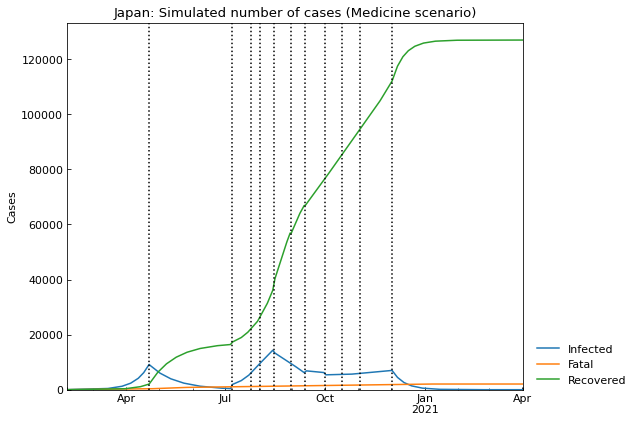

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,129002,2061,0,126941
418,2021-03-30,129002,2061,0,126941
419,2021-03-31,129002,2061,0,126941
420,2021-04-01,129002,2061,0,126941
421,2021-04-02,129002,2061,0,126941


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,11th_Rt
Main,14322,14Aug2020,245771,13919,3326,1.06
Medicine,14322,14Aug2020,129002,0,2061,0.53


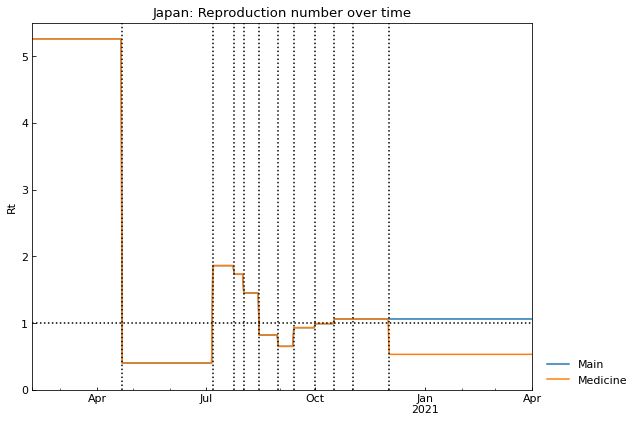

In [41]:
_ = snl.history(target="Rt")

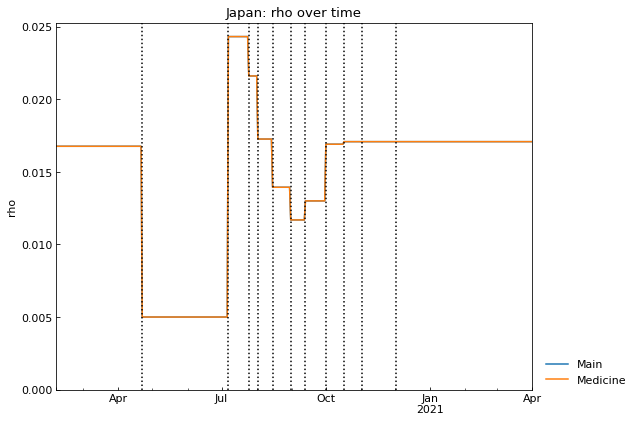

In [42]:
_ = snl.history(target="rho")

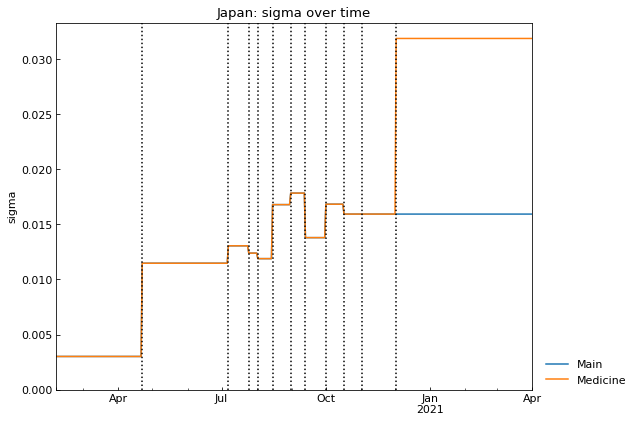

In [43]:
_ = snl.history(target="sigma")

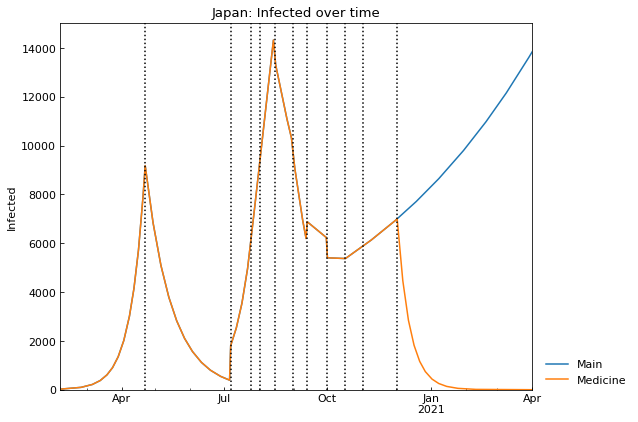

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

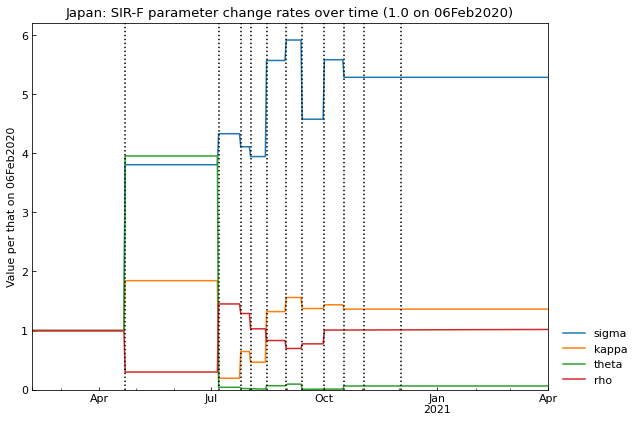

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (17Oct2020 - 01Nov2020): finished 1682 trials in 1 min  0 sec


	 3rd phase (25Jul2020 - 01Aug2020): finished  798 trials in 0 min 20 sec

	 2nd phase (07Jul2020 - 24Jul2020): finished  961 trials in 0 min 25 sec

	 5th phase (15Aug2020 - 30Aug2020): finished  444 trials in 0 min 10 sec

	 6th phase (31Aug2020 - 12Sep2020): finished  239 trials in 0 min  5 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1792 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 06Jul2020): finished 1792 trials in 1 min  0 sec

	 7th phase (13Sep2020 - 30Sep2020): finished  801 trials in 0 min 20 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1920 trials in 1 min  0 sec

	 8th phase (01Oct2020 - 16Oct2020): finished 2033 trials in 1 min  0 sec

Completed optimization. Total: 3 min  1 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 6th phase (31Aug2020 - 01Nov2020): finished 6214 trials in 1 min  0 sec

Completed optimization. Total: 1 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  21Apr2020  SIR-F  5.26  0.016596  0.000122   
              1st    22Apr2020  06Jul2020  SIR-F  0.40  0.065616  0.000226   
              2nd    07Jul2020  24Jul2020  SIR-F  1.86  0.000673  0.000024   
              3rd    25Jul2020  01Aug2020  SIR-F  1.73  0.000345  0.000079   
              4th    02Aug2020  14Aug2020  SIR-F  1.45  0.000164  0.000057   
              5th    15Aug2020  30Aug2020  SIR-F  0.82  0.001119  0.000162   
              6th    31Aug2020  12Sep2020  SIR-F  0.65  0.001569  0.000191   
              7th    13Sep2020  30Sep2020  SIR-F  0.81  0.001888  0.000199   
              8th    01Oct2020  16Oct2020  SIR-F  0.99  0.000171  0.000176   
              9th    17Oct2020  01Nov2020  SIR-F  1.06  0.001040  0.000167   
Retrospective 0th    06Feb2020  21Apr2020  SIR-F  5.26  0.016596  0.000122   
              1st    22Apr2020  06Jul2020  SIR-F  0.40  0.065616  0.000226   
              2nd    07Jul2020  24Jul2020  SIR-F  1.86  0.000673  0.000024   
              3rd    25Jul2020  01Aug2020  SIR-F  1.73  0.000345  0.000079   
              4th    02Aug2020  14Aug2020  SIR-F  1.45  0.000164  0.000057   
              5th    15Aug2020  30Aug2020  SIR-F  0.82  0.001119  0.000162   
              6th    31Aug2020  01Nov2020  SIR-F  0.82  0.001119  0.000162   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.016762  0.003014  0.949789    1792  1 min  0 sec  
              1st    0.005004  0.011469  0.950529    1792  1 min  0 sec  
              2nd    0.024316  0.013050  0.036936     961  0 min 25 sec  
              3rd    0.021604  0.012385  0.017876     798  0 min 20 sec  
              4th    0.017260  0.011885  0.069528    1920  1 min  0 sec  
              5th    0.013940  0.016784  0.029649     444  0 min 10 sec  
              6th    0.011691  0.017826  0.036445     239  0 min  5 sec  
              7th    0.012245  0.014969  0.039058     801  0 min 20 sec  
              8th    0.016904  0.016822  0.017738    2033  1 min  0 sec  
              9th    0.017081  0.015925  0.038215    1682  1 min  0 sec  
Retrospective 0th    0.016762  0.003014  0.949789    1792  1 min  0 sec  
              1st    0.005004  0.011469  0.950529    1792  1 min  0 sec  
              2nd    0.024316  0.013050  0.036936     961  0 min 25 sec  
              3rd    0.021604  0.012385  0.017876     798  0 min 20 sec  
              4th    0.017260  0.011885  0.069528    1920  1 min  0 sec  
              5th    0.013940  0.016784  0.029649     444  0 min 10 sec  
              6th    0.013940  0.016784  0.429280    6214  1 min  0 sec

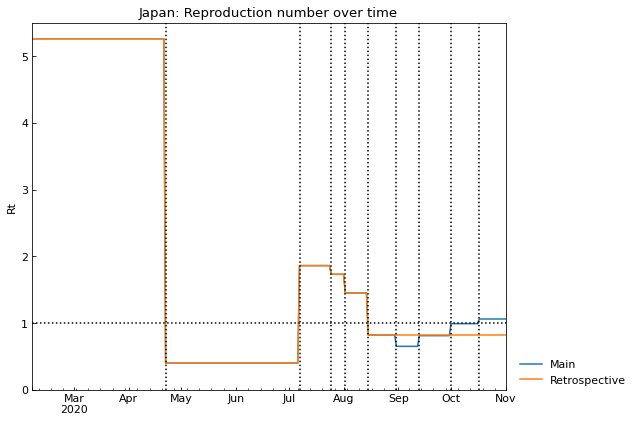

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

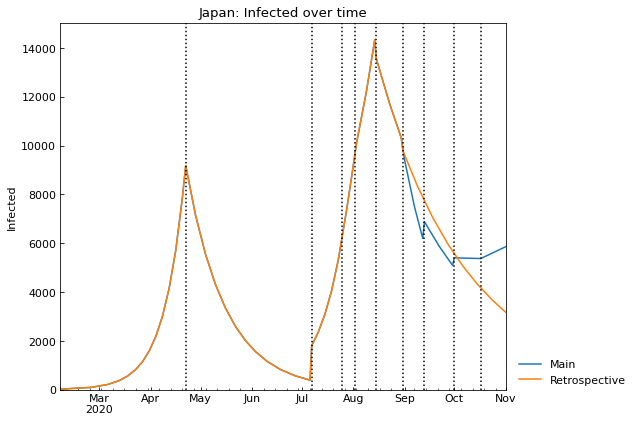

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 02Nov2020,Infected on 02Nov2020,Fatal on 02Nov2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt
Main,14322,14Aug2020,101283,5890,1761,0.65,0.81,0.99,1.06
Retrospective,14322,14Aug2020,98522,3116,1669,0.82,-,-,-
